In [1]:
import os
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
plt.style.use('seaborn-whitegrid')

#### Define functions

In [2]:
def read_file(dir_list, folder_path):
    file_list=[]
    for filename in dir_list: 
        file_list.append(pd.read_csv(folder_path + filename))

    df = pd.concat(file_list)
    df.reset_index(inplace = True, drop = True)
    df['Date'] = pd.to_datetime(df['Date'])
    # df.set_index('Date', inplace = True)
    return df

In [3]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [4]:
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=14):
    data = df.copy()
    high = data['high']
    low = data['low']
    close = data['close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    return atr

In [5]:
def plot_p(df, chart_type):
    if chart_type == 'candle':
        mpf.plot(df,type='candle', volume=True, figratio=(23,15), figscale=1, show_nontrading=True, style='yahoo')
    elif chart_type == 'line':
        mpf.plot(df,type='line', volume=True, figratio=(23,15), figscale=1, show_nontrading=True, style='yahoo')

#### Plot

In [6]:
folder_path = 'D:/Database/Crypto data/_coin_api/'
dir_list = os.listdir(folder_path)
# print(dir_list)
df = read_file(dir_list, folder_path)
df['ATR'] = atr(df, n = 14)

In [7]:
### Close price
# group by hour and minute
df_close_by_all = df.groupby([df.Date.dt.hour, df.Date.dt.minute])["close"].agg([np.min, percentile(25), np.median, np.mean, percentile(75), np.max])
# group by hour only
df_close_by_hour = df.groupby([df.Date.dt.hour])["close"].agg([np.min, percentile(25), np.median, np.mean, percentile(75), np.max])

In [8]:
### Volume
# group by hour and minute
df_volume_by_all = df.groupby([df.Date.dt.hour, df.Date.dt.minute])["volume"].agg([np.min, percentile(25), np.median, np.mean, percentile(75), np.max])
# group by hour only
df_volume_by_hour = df.groupby([df.Date.dt.hour])["volume"].agg([np.min, percentile(25), np.median, np.mean, percentile(75), np.max])

### ATR
# group by hour and minute
df_ATR_by_all = df.groupby([df.Date.dt.hour, df.Date.dt.minute])["ATR"].agg([np.min, percentile(25), np.median, np.mean, percentile(75), np.max])
# group by hour only
df_ATR_by_hour = df.groupby([df.Date.dt.hour])["ATR"].agg([np.min, percentile(25), np.median, np.mean, percentile(75), np.max])

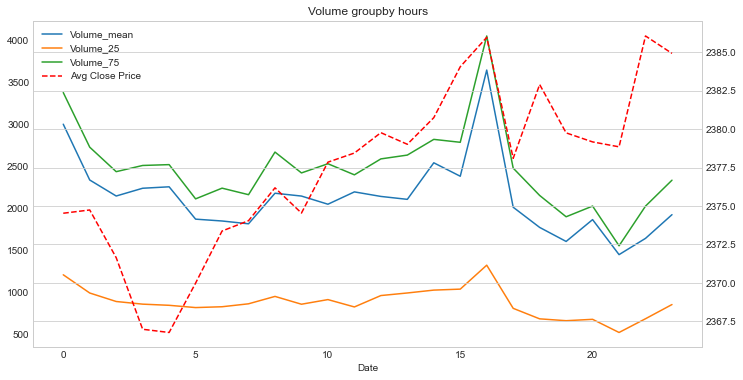

In [9]:
plt.figure(figsize=(12,6))
plt.xlabel('Hours of the day')
plt.title('Volume groupby hours')

ax1 = df_volume_by_hour['mean'].plot(label = 'Volume_mean')
ax2 = df_volume_by_hour['percentile_25'].plot(label = 'Volume_25')
ax3 = df_volume_by_hour['percentile_75'].plot(label = 'Volume_75')
ax4 = df_close_by_hour['mean'].plot(style = 'r--', secondary_y=True, label='Avg Close Price')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()


plt.legend(h1+h4, l1+l4, loc=2)
plt.show()

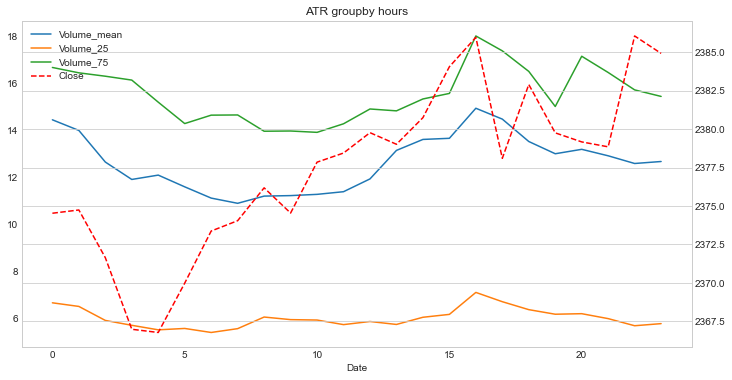

In [10]:
plt.figure(figsize=(12,6))
plt.xlabel('Hours of the day')
plt.title('ATR groupby hours')

ax1 = df_ATR_by_hour['mean'].plot(label = 'Volume_mean')
ax2 = df_ATR_by_hour['percentile_25'].plot(label = 'Volume_25')
ax3 = df_ATR_by_hour['percentile_75'].plot(label = 'Volume_75')
ax4 = df_close_by_hour['mean'].plot(style = 'r--', secondary_y=True, label='Close')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()


plt.legend(h1+h4, l1+l4, loc=2)
plt.show()

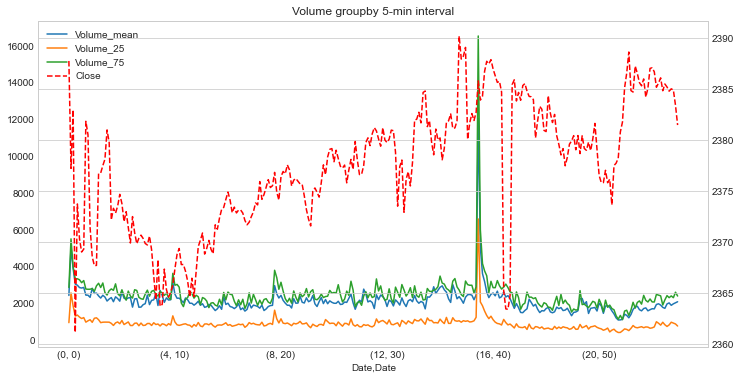

In [11]:
plt.figure(figsize=(12,6))
plt.xlabel('Hours of the day')
plt.title('Volume groupby 5-min interval')

ax1 = df_volume_by_all['mean'].plot(label = 'Volume_mean')
ax2 = df_volume_by_all['percentile_25'].plot(label = 'Volume_25')
ax3 = df_volume_by_all['percentile_75'].plot(label = 'Volume_75')
ax4 = df_close_by_all['mean'].plot(style = 'r--', secondary_y=True, label='Close')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()


plt.legend(h1+h4, l1+l4, loc=2)
plt.show()

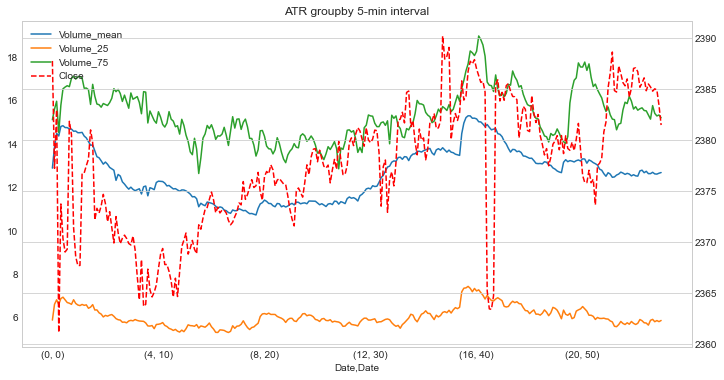

In [12]:
plt.figure(figsize=(12,6))
plt.xlabel('Hours of the day')
plt.title('ATR groupby 5-min interval')

ax1 = df_ATR_by_all['mean'].plot(label = 'Volume_mean')
ax2 = df_ATR_by_all['percentile_25'].plot(label = 'Volume_25')
ax3 = df_ATR_by_all['percentile_75'].plot(label = 'Volume_75')
ax4 = df_close_by_all['mean'].plot(style = 'r--', secondary_y=True, label='Close')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
h4, l4 = ax4.get_legend_handles_labels()


plt.legend(h1+h4, l1+l4, loc=2)
plt.show()

### Smoothing method

#### Wavelet

In [13]:
import pywt

In [14]:
def madev(d, axis=None):
    """ Mean absolute deviation of a signal """
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def wavelet_denoising(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * madev(coeff[-level])
    uthresh = sigma * np.sqrt(2 * np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff, wavelet, mode='per')

In [15]:
wavelet_smooth = wavelet_denoising(df.close, wavelet='coif5', level=1)

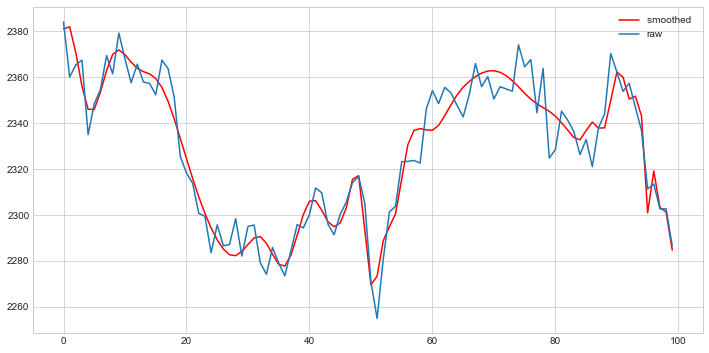

In [16]:
plt.figure(figsize=(12,6))
ax1 = plt.plot(wavelet_smooth[-100:], 'r')
ax2 = plt.plot(df.close[-100:].to_numpy())
plt.legend(['smoothed ', 'raw'])
plt.show()

#### Savgol filter

In [17]:
from scipy.signal import savgol_filter

In [30]:
savgol_smooth = savgol_filter(df.close, 13, 5)
savgol_df = pd.DataFrame(savgol_smooth, columns = ['close'], index = df.Date)
close_df = pd.DataFrame(df.close.to_numpy(), columns = ['close'], index = df.Date)

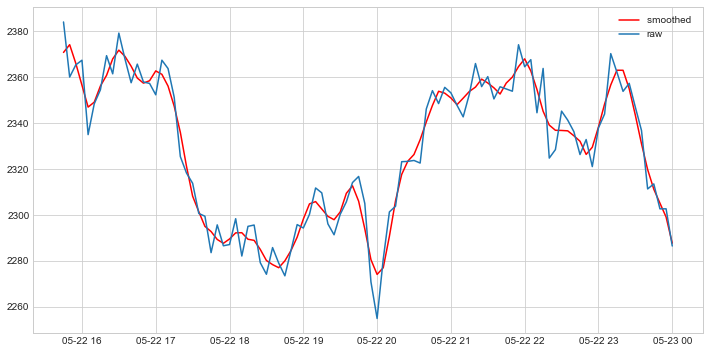

In [31]:
plt.figure(figsize=(12,6))
ax1 = plt.plot(savgol_df.iloc[-100:], 'r')
ax2 = plt.plot(close_df[-100:])
plt.legend(['smoothed ', 'raw'])
plt.show()

#### Comparison (SNR and MSE)

In [32]:
from sklearn.metrics import mean_squared_error


In [33]:
MSE_wavelet = mean_squared_error(df.close, wavelet_smooth)
MSE_savgol = mean_squared_error(df.close, savgol_smooth)

In [34]:
print('Wavelet MSE: {}'.format(MSE_wavelet))
print('Savgol MSE: {}'.format(MSE_savgol))

Wavelet MSE: 50.61749252245827
Savgol MSE: 47.70747144859777
